In [1]:
import pandas as pd

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Параметры отображения графиков:
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams.update({'font.size': 11})
plt.style.use('seaborn-colorblind')

# Считывание и анализ данных

In [5]:
# Считываем данные:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv'
data = pd.read_csv(path)

In [6]:
# Вид исходных данных:
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


##### Параметры датафрейма:
- 'Product_Code' - наименования продукта
- 'W0'-'W51' - абсолютные продажи в шт. с 1-й по 52-ю неделю
- 'Normalized 0' - 'Normalized 51' - нормализованные продажи понедельно

In [7]:
# Количество записей в базе и количество столбцов:
data.shape

(811, 107)

In [8]:
# Общие сведения о еженедельных данных:
stats = data.loc[:, 'W0':'W51'].describe()
stats

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,8.394575,8.318126,8.434032,8.556104,8.720099,8.670777,8.674476,8.895191,8.861899,8.889026
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,11.348777,11.250455,11.223499,11.382041,11.621684,11.435870,11.222996,10.941375,10.492710,9.558011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,10.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,13.000000,14.000000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,52.000000,50.000000,46.000000,46.000000,55.000000,49.000000,50.000000,52.000000,57.000000,73.000000


In [9]:
# Динамика продаж по неделям:
weeks = [i for i in range(1, 53)]
max_sales = stats.loc['max', 'W0':'W51']
mean_sales = stats.loc['mean', 'W0':'W51']
total_sales = data.loc[:, 'W0':'W51'].sum()
cum_sales = total_sales.cumsum()

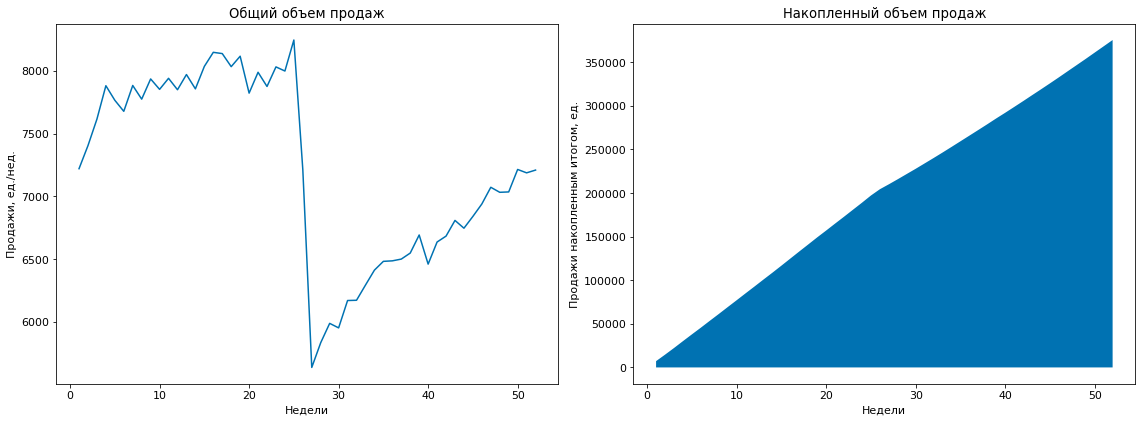

In [10]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(16, 6))

ax_1.plot(weeks, total_sales)
ax_1.set_title('Общий объем продаж')
ax_1.set_xlabel('Недели')
ax_1.set_ylabel('Продажи, ед./нед.')

ax_2.stackplot(weeks, cum_sales)
ax_2.set_title('Накопленный объем продаж')
ax_2.set_xlabel('Недели')
ax_2.set_ylabel('Продажи накопленным итогом, ед.')

fig.tight_layout()

##### Динамика общего объема продаж по периодам:
- 'W0'-'W24' - продажи преимущественно росли (+14.2% - с 7220 до 8245 ед.)
- 'W25'-'W26' - резкое и значительное снижение продаж (-31.6% - c 8245 до 5637 ед.)
- 'W27'-'W51' - возобновление роста с более низкого уровня (27.9% - с 5637 до 7209 ед.)

In [11]:
# Начало и конец временного ряда, пиковое значение и спад продаж:
ind = ['W0'] + [f'W{i}' for i in range(23, 29)] + ['W51']
total_sales[ind]

W0     7220
W23    7998
W24    8245
W25    7212
W26    5637
W27    5834
W28    5988
W51    7209
dtype: int64

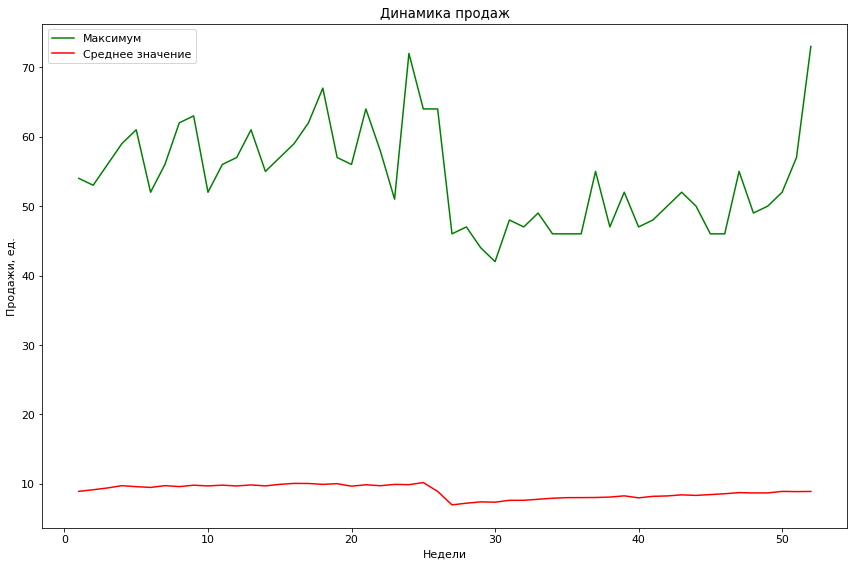

In [12]:
plt.plot(weeks, max_sales, color='green', label='Максимум')
plt.plot(weeks, mean_sales, color='r', label='Среднее значение')
plt.xlabel('Недели')
plt.ylabel('Продажи, ед.')
plt.legend()
plt.title('Динамика продаж')
plt.tight_layout()

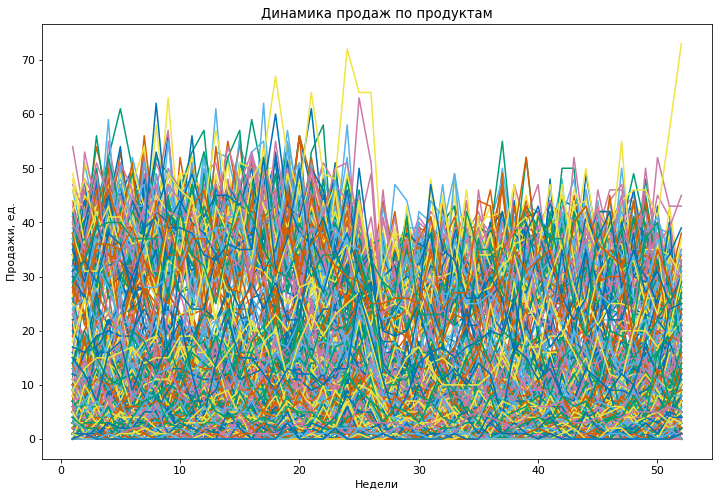

In [13]:
# Визуализация всех категорий на одном графике:
for row in data.loc[:, 'W0':'W51'].iterrows():
    plt.plot(weeks, row[1])
plt.title('Динамика продаж по продуктам')
plt.xlabel('Недели')
plt.ylabel('Продажи, ед.')
fig.tight_layout()

Визуальный анализ графика неинформативен: слишком большое количество продуктов.

In [14]:
# Вычисляем параметры, характеризующие продажи продуктов до и после пика, а также за весь период:
for period, start, end in (('_before', 'W0', 'W24'), ('_after', 'W26', 'W51'), ('', 'W0', 'W51')):
    data[f'Total{period}'] = data.loc[:, start:end].sum(axis='columns')  # Продано всего
    data[f'Mean{period}'] = data.loc[:, start:end].mean(axis='columns')  # В среднем за неделю
    data[f'Median{period}'] = data.loc[:, start:end].median(axis='columns')  # Медиана за неделю
    data[f'Min{period}'] = data.loc[:, start:end].min(axis='columns')  # Недельный минимум
    data[f'Max{period}'] = data.loc[:, start:end].max(axis='columns')  # Недельный максимум
    data[f'Std{period}'] = data.loc[:, start:end].std(axis='columns')  # Стандартное отклонение
    data[f'Var{period}'] = data.loc[:, start:end].var(axis='columns')  # Вариация

In [15]:
# Вид данных после добавления новых параметров:
data.loc[:, 'Total_before':].head()

,Total_before,Mean_before,Median_before,Min_before,Max_before,Std_before,Var_before,Total_after,Mean_after,Median_after,...,Max_after,Std_after,Var_after,Total,Mean,Median,Min,Max,Std,Var
0,267,10.68,11.0,3,21,3.923434,15.393333,225,8.653846,8.5,...,17,3.309892,10.955385,501,9.634615,10.0,3,21,3.694346,13.648190
1,106,4.24,4.0,0,9,2.402776,5.773333,98,3.769231,3.5,...,10,2.388434,5.704615,207,3.980769,3.5,0,10,2.363865,5.587858
2,229,9.16,9.0,4,14,2.511308,6.306667,215,8.269231,8.0,...,14,3.305241,10.924615,452,8.692308,8.0,3,14,2.920774,8.530920
3,221,8.84,9.0,4,15,3.411744,11.640000,203,7.807692,8.0,...,19,3.741863,14.001538,430,8.269231,8.0,2,19,3.565166,12.710407
4,241,9.64,9.0,4,18,3.352611,11.240000,187,7.192308,7.0,...,13,2.653590,7.041538,440,8.461538,8.0,3,18,3.238624,10.488688


Text(0.5, 0.98, 'Распределение продуктов по объемам продаж')

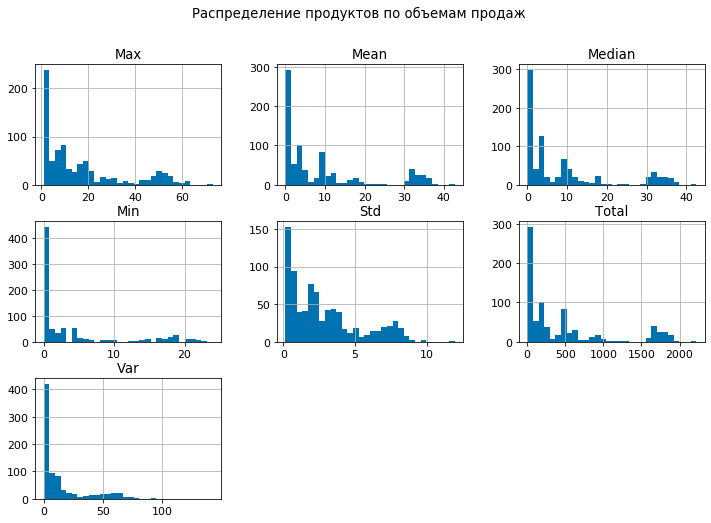

In [16]:
data.loc[:, 'Total':'Var'].hist(bins=30)
plt.suptitle('Распределение продуктов по объемам продаж')

In [17]:
# Абсолютное изменение средних продаж до и после спада:
data['Delta'] = data.loc[:, 'W26':'W51'].mean(axis='columns') - data.loc[:, 'W0':'W24'].mean(axis='columns')

Text(0.5, 1.0, 'Изменение продаж после W26')

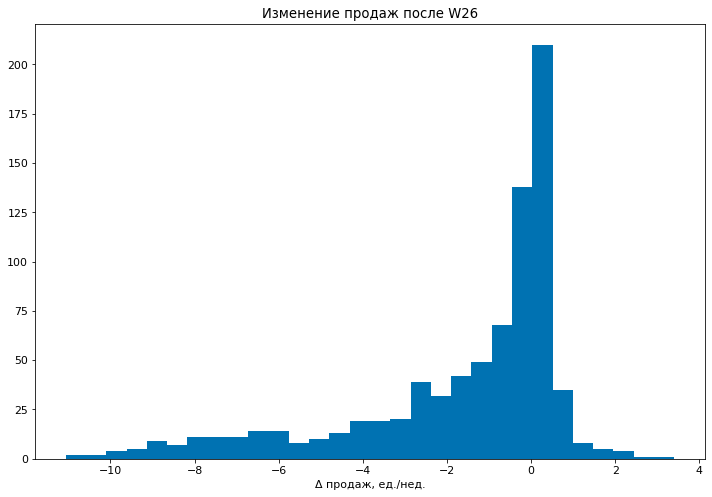

In [18]:
plt.hist(data['Delta'], bins=30)
plt.xlabel('Δ продаж, ед./нед.')
plt.title('Изменение продаж после W26')

##### Динамика продаж:
- Средние продажи большинства продуктов в период после 'W26' снизились, по сравнению с периодом до 'W24'.
- По остальным продуктам прирост продаж был существенно меньше, чем потери, наблюдавшиеся по основной массе товаров.

In [19]:
# Разбиваем продукты на 3 группы:
data['Group'] = 'Продавались до и после пика'
data.loc[data['Total_after'] == 0, 'Group'] = 'Продавались до пика'
data.loc[data['Total_before'] == 0, 'Group'] = 'Продавались после пика'

In [20]:
groups = data['Group'].value_counts(normalize=True)
groups

Продавались до и после пика    0.960543
Продавались после пика         0.025894
Продавались до пика            0.013564
Name: Group, dtype: float64

Text(0.5, 1.0, 'Структура спроса на продукты до и после пика')

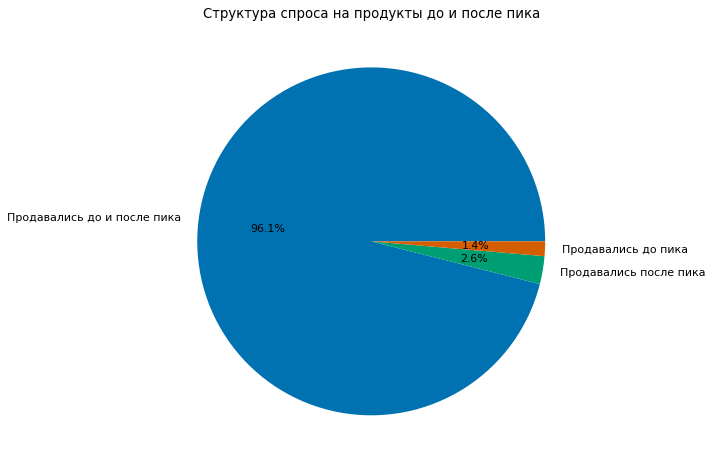

In [21]:
plt.pie(groups.values, labels=groups.index, autopct='%1.1f%%')
plt.title('Структура спроса на продукты до и после пика')

##### Изменение структуры продаж:
Замещение части продуктов новыми после W26 не оказывало существенного влияния на общий объем продаж, т.к. эти продукты демонстрировали невысокий абсолютный объем продаж и составляли незначительную часть ассортимента.

Text(0.5, 0.98, 'Распределение продуктов, продававшихся только до пика')

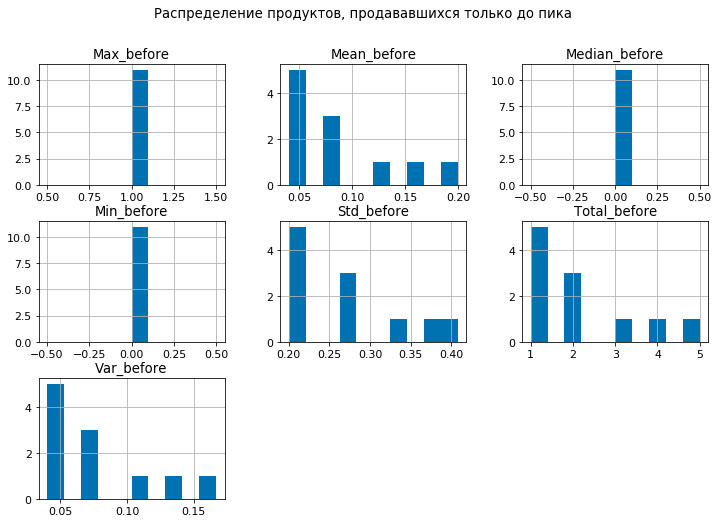

In [22]:
data.loc[data['Group'] == 'Продавались до пика', 'Total_before':'Var_before'].hist(bins=10)
plt.suptitle('Распределение продуктов, продававшихся только до пика')

Text(0.5, 0.98, 'Распределение продуктов, продававшихся только после пика')

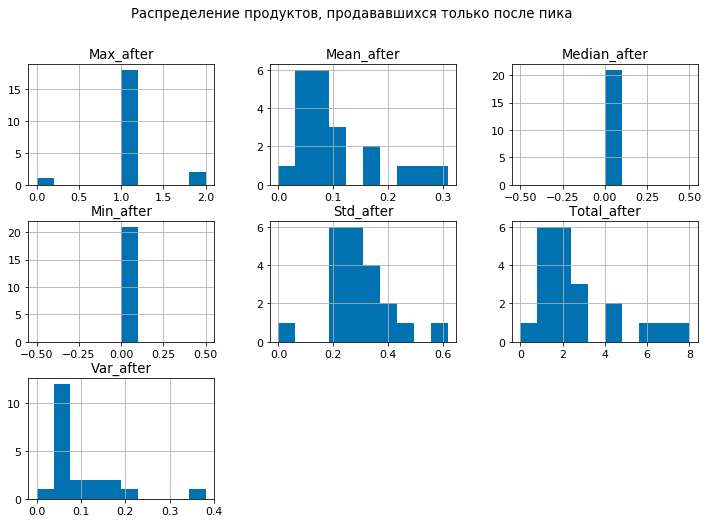

In [23]:
data.loc[data['Group'] == 'Продавались после пика', 'Total_after':'Var_after'].hist(bins=10)
plt.suptitle('Распределение продуктов, продававшихся только после пика')

# Создание моделей кластеризации

In [24]:
def cluster_products(df, n_clusters: int):
    """Функция выполняет кластеризацию данных на основе модели KMeans.
    Аргументы:
        df - pandas.DataFrame с данными о продажах.
        n_clusters - количество искомых кластеров.
    Возвращает:
        pandas.Series с кодами кластеров."""
    
    # Инструмент для стандартизации числовых значений:
    scaler = StandardScaler()
    
    # Пайплайн, включающий модель кластеризации и предобработку данных:
    pipe = make_pipeline(scaler, KMeans(n_clusters=n_clusters))
    
    return pipe.fit_predict(df)

In [25]:
def clusters_piechart(seq):
    """Функция выводит график соотношения кластеров.
    Аргументы:
        seq - pandas.Series с кодами кластеров."""
    seq.value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Распределение продуктов по кластерам')

In [26]:
def plot_clusters(df, cluster: str):
    """Функция выводит график распределения продуктов,
    относящихся к разным кластерам, в осях,
    отображающих медианные продажи и общий объем продаж.
    Аргументы:
        df - pandas.DataFrame с 3 столбцами (медианные продажи,
        общие продажи, коды кластеров).
        cluster - наименование столбца с кластерами."""
    plt.scatter(df['Median'], df['Total'], c=df[cluster])
    plt.xlabel('Медианные продажи за неделю, ед.')
    plt.ylabel('Общий объем продаж, ед.')
    plt.title(f'Кластеры')

### Сравнение моделей с разными наборами исходных данных

In [27]:
# Формируем 2 набора параметров для модели:
X_base = data.loc[:, 'Total':'Delta']  # Параметры за 52 недели в целом.
X_extended = data.loc[:, 'Total_before':'Var']  # Параметры до и после спада и за весь период.

In [28]:
# Определяем кластеры по базовому набору параметров:
data['Cluster'] = cluster_products(X_base, 4)

In [29]:
# Определяем кластеры по расширенному набору параметров:
data['Cluster_ext'] = cluster_products(X_extended, 4)

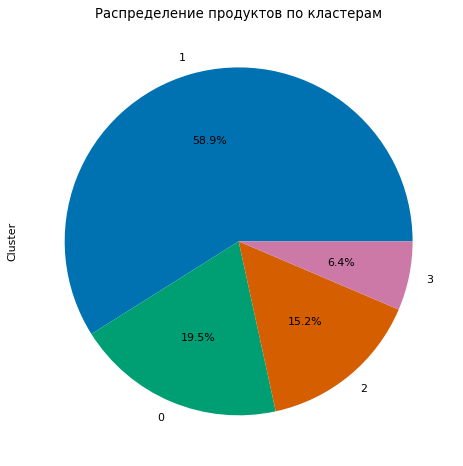

In [30]:
# Структура кластеров на базовом наборе параметров:
clusters_piechart(data['Cluster'])

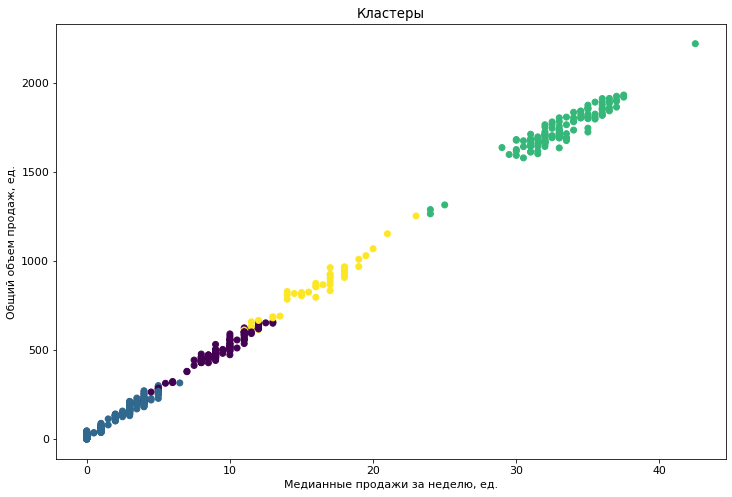

In [31]:
# Распределение кластеров на базовом наборе параметров:
plot_clusters(data, cluster='Cluster')

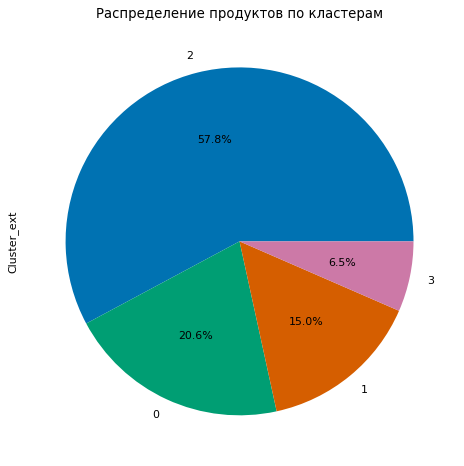

In [32]:
# Структура кластеров на расширенном наборе параметров:
clusters_piechart(data['Cluster_ext'])

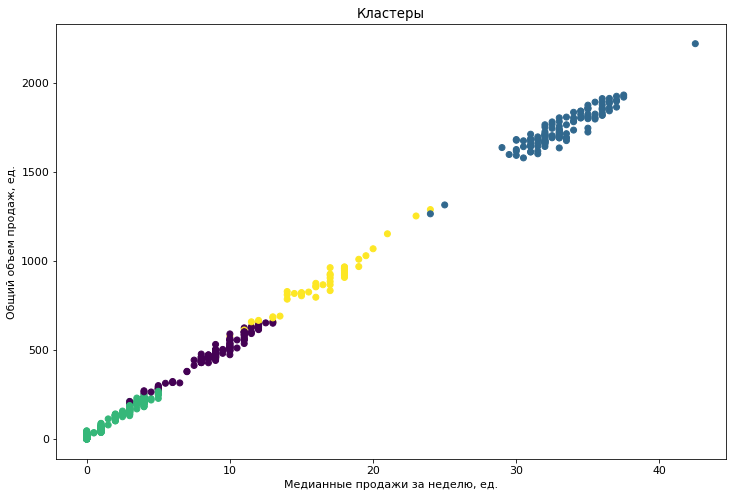

In [33]:
# Распределение кластеров на расширенном наборе параметров:
plot_clusters(data, cluster='Cluster_ext')

Полученное соотношение и распределение кластеров на основе базового и расширенного набора исходных данных близки, что позволяет сделать вывод о возможности использования базовых параметров без существенной потери точности модели.

In [34]:
# Соотношение кластеров для разных групп продуктов:
data.groupby('Group')['Cluster'].value_counts(normalize=True)

Group                        Cluster
Продавались до и после пика  1          0.572529
                             0          0.202824
                             2          0.157895
                             3          0.066752
Продавались до пика          1          1.000000
Продавались после пика       1          1.000000
Name: Cluster, dtype: float64

- Выбывшие из ассортитмента продукты и заместившие их новые продукты относятся к одному и тому же кластеру, что подтверждает ранее сделанное предположение о сравнительной взаимозаменяемости этих товаров и слабом влиянии на общую динамику продаж.
- Идентифицированные моделью кластеры могут быть использованы для ранжирования продуктов по степени значимости в общем товарообороте, однако для полноценного ABC-анализа в выборке не хватает данных о выручке от продаж.

### Подбор оптимального количества кластеров

In [35]:
# Диапазон значений для поиска оптимального количества кластеров:
clusters_range = range(2, 15)

In [36]:
# Список для добавления значений параметра inertia каждой из моделей
# (сумма квадратов расстояний до центра кластера):
distances = []

In [37]:
for n_clusters in clusters_range:
    pipe = make_pipeline(StandardScaler(), KMeans(n_clusters=n_clusters))
    pipe.fit(X_base)
    distances.append(pipe[1].inertia_)

In [38]:
for n_clusters, distance in zip(clusters_range, distances):
    print(f'{n_clusters} кластеров - {distance}')

2 кластеров - 1321.7167555742892
3 кластеров - 543.6308969642124
4 кластеров - 412.0678410200551
5 кластеров - 317.00319357173714
6 кластеров - 249.2215054101324
7 кластеров - 228.56801012282062
8 кластеров - 210.20621050546876
9 кластеров - 199.66013995368093
10 кластеров - 186.59214870736054
11 кластеров - 170.8732795530499
12 кластеров - 157.88608809093552
13 кластеров - 150.48471056445402
14 кластеров - 140.70378338369238


Text(0.5, 1.0, 'Подбор оптимального количества кластеров')

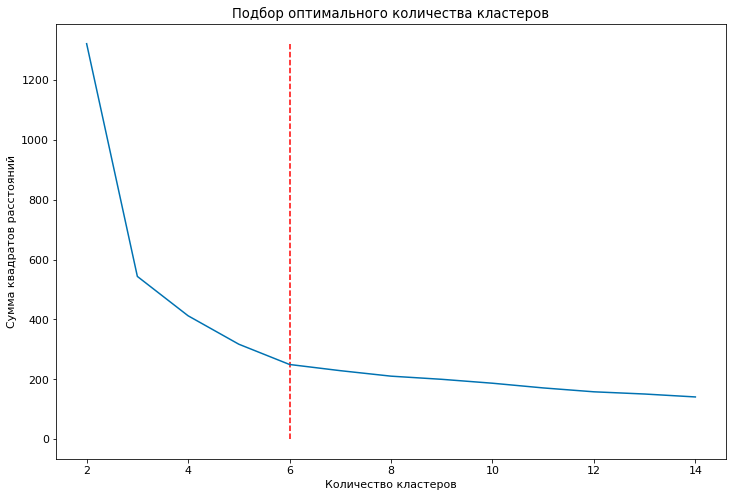

In [39]:
plt.plot(clusters_range, distances)
plt.vlines(x=6, ymin=0, ymax=max(distances), color='r', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Подбор оптимального количества кластеров')

In [40]:
# Определяем 6 кластеров по базовому набору параметров:
data['Cluster'] = cluster_products(X_base, 6)

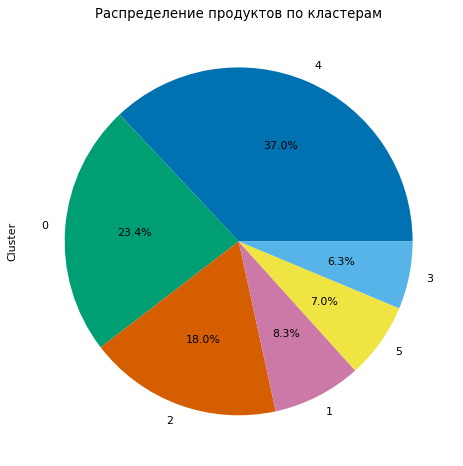

In [41]:
# Структура кластеров на базовом наборе параметров:
clusters_piechart(data['Cluster'])

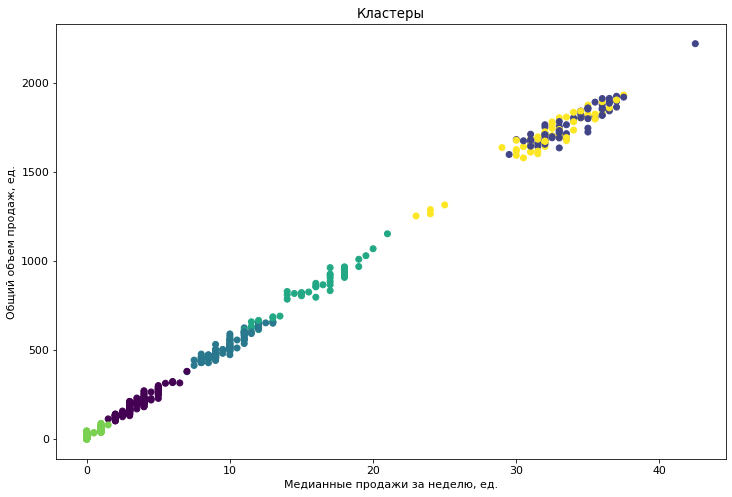

In [42]:
# Распределение кластеров на базовом наборе параметров:
plot_clusters(data, cluster='Cluster')

In [43]:
# Соотношение кластеров для разных групп продуктов:
data.groupby('Group')['Cluster'].value_counts(normalize=True)

Group                        Cluster
Продавались до и после пика  4          0.344031
                             0          0.243902
                             2          0.187420
                             1          0.086008
                             5          0.073171
                             3          0.065469
Продавались до пика          4          1.000000
Продавались после пика       4          1.000000
Name: Cluster, dtype: float64

Выбывшие из ассортитмента продукты и заместившие их новые продукты по-прежнему относятся к одному и тому же кластеру. Общее количество кластеров увеличилось. Часть из них на двухмерном графике перекрывают друг друга, что обусловлено большим количеством параметров модели, не отображаемых на графике.